In [1]:
import glob
import numpy as np
import pandas as pd
from modules import show_mod

In [2]:
officeList = glob.glob("data/*")

for office in officeList:
    boxCountList = glob.glob(office + "/RiskOfInfection/*/BoxCount.csv")
    print(boxCountList)

['data/office2/RiskOfInfection/660_246_aout/BoxCount.csv', 'data/office2/RiskOfInfection/360_246_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_0/BoxCount.csv', 'data/office2/RiskOfInfection/360_82_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_246_aout/BoxCount.csv', 'data/office2/RiskOfInfection/360_164_aout/BoxCount.csv', 'data/office2/RiskOfInfection/660_246_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_164_aout/BoxCount.csv', 'data/office2/RiskOfInfection/660_0/BoxCount.csv', 'data/office2/RiskOfInfection/360_164_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_246_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_82_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_82_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_164_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_82_aout/BoxCount.csv', 'data/office2/RiskOfInfection/0_164_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_82_aout/BoxCount.csv', 'data/office2/RiskOfInfection/0_246_bout/Box

In [38]:
# a = np.loadtxt('data/office1/RiskOfInfection/0_0/BoxCount_A.csv', delimiter=',')

# boxCountFNAME = boxCountList[0]
boxCountFNAME = 'data/office1/RiskOfInfection/0_0/BoxCount.csv'
print(boxCountFNAME)
df = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office7/RiskOfInfection/960_246_bout/BoxCount.csv'
print(boxCountFNAME)
df_max = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office22/RiskOfInfection/360_82_bout/BoxCount.csv'
print(boxCountFNAME)
df_min = pd.read_csv(boxCountFNAME)

data/office1/RiskOfInfection/0_0/BoxCount.csv
data/office7/RiskOfInfection/960_246_bout/BoxCount.csv
data/office22/RiskOfInfection/360_82_bout/BoxCount.csv


- 荒木雅弘先生へメールしたが，「専門外」とのこと
- 学内に機械学習の専門家は他におられない？

$$ 1 - \mathrm{exp} \left( - \frac{N}{N_0} I \right) $$

$$ N_0 = 900 \space \mathrm{[viral copy / h]} $$
$$ N = nv \space \mathrm{[viral copy / h]} $$
$$ n = 10^{-7} \space \mathrm{[viral copy / ml]} $$

$$ I_{original} = 1 $$

$$ I_\alpha = 1.32 $$
$$ I_\delta = 1.5 I_\alpha $$
$$ I_{BA1} = 4.2 I_\delta $$
$$ I_{BA2} = 1.26 I_{BA1} $$
$$ I_{BA5} = 1.27 I_{BA2} $$
$$ I_{BA2.75} = 3.24 I_{BA5} $$

<!-- $$ I_\delta = 2.5 $$
$$ I_\omicron = 2.5 \cdot 1.4 $$
$$ I_{BA.5} = 1.3 I_{BA.2} $$
$$ I_{BA.2} = ? $$ -->

[BA.5とBA.2の比について](https://www.covid19-ai.jp/ja-jp/presentation/2022_rq1_simulations_for_infection_situations/articles/article367/)

In [39]:
I = 10.
def RateOfInfection(volume):
    """
    感染率計算
    飛沫シミュレーションは１分間しか行っていないので，１分間あたりに換算
    """
    ROI = 1. - np.exp( - volume * 1e7 / (900./60.) * I)
    return ROI

In [52]:
r = RateOfInfection(df['volume'])
r

a = df['RoI'].to_numpy()
a = r.to_numpy()
print(a.shape)
b = a.reshape(55, 60)
print(b.shape)

ROI_original = df['RoI'].to_numpy().reshape(55, 60)

(3300,)
(55, 60)


平均値：6.37%


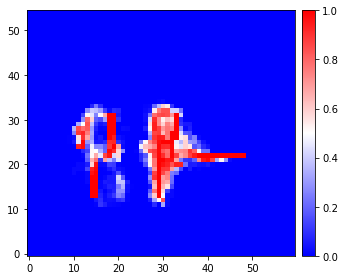

平均値：10.73%


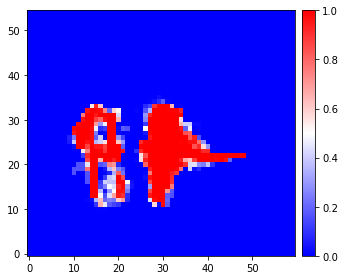

In [53]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_original.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_original, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(b.mean()))
#選んだ1個をプロット
show_mod.show_image(b, cbar=True, cmap=cmap, vmin=0)

In [47]:
ROI_max = df_max['RoI'].to_numpy().reshape(40, 90)
ROI_min = df_min['RoI'].to_numpy().reshape(65, 85)

平均値：9.15%


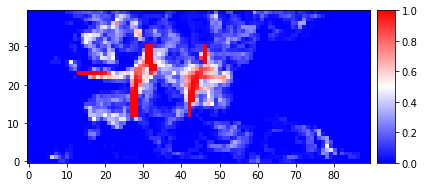

平均値：2.09%


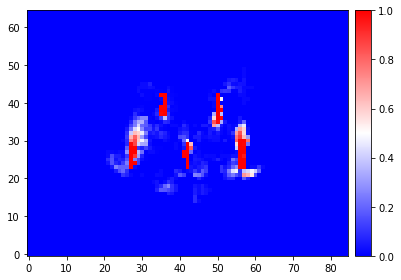

In [48]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_max.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_max, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(ROI_min.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_min, cbar=True, cmap=cmap, vmin=0)

In [62]:
threshold_array = np.linspace(0., 0.9, 10)

for threshold in threshold_array:
    print("====================================")
    print(threshold)
    rate_min = np.count_nonzero(ROI_min > threshold) / ROI_min.size
    rate_max = np.count_nonzero(ROI_max > threshold) / ROI_max.size
    print(rate_min, rate_max)
    print((rate_max - rate_min)/(rate_max + rate_min))


0.0
0.16760180995475113 0.57
0.5455493528004416
0.1
0.036380090497737556 0.25055555555555553
0.7464233461535092
0.2
0.02570135746606335 0.14694444444444443
0.702264900951535
0.30000000000000004
0.021357466063348415 0.09
0.6164160910199106
0.4
0.017918552036199097 0.06166666666666667
0.5497015066805647
0.5
0.01574660633484163 0.04416666666666667
0.47435332620051607
0.6000000000000001
0.014298642533936652 0.035833333333333335
0.4295599849567507
0.7000000000000001
0.01248868778280543 0.02861111111111111
0.3922749931190556
0.8
0.011583710407239819 0.023055555555555555
0.3311803766464676
0.9
0.010135746606334841 0.01861111111111111
0.29482751082156444


In [1]:
import pandas as pd

df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_221015.csv")

df_summary

,casename,num_drop,volume[ml],RoI,aircon,ventilation,exhaust
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b
...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a


In [3]:
df_summary[["aircon", "ventilation", "RoI"]].describe()

,aircon,ventilation,RoI
count,431.000000,431.000000,431.000000
mean,499.071926,139.837587,161.902247
std,360.876287,83.985694,36.376848
min,0.000000,0.000000,62.961905
25%,0.000000,82.000000,138.530952
50%,660.000000,164.000000,159.866667
75%,960.000000,246.000000,188.787879
max,960.000000,246.000000,240.763636


In [4]:
df_summary["office"] = df_summary["casename"].map(lambda casename: casename.split("_")[0])

In [6]:
df_summary

,casename,num_drop,volume[ml],RoI,aircon,ventilation,exhaust,office
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,office2
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,office2
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,office2
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,office2
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,office2
...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,office3
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,office3
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,office3
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,office3


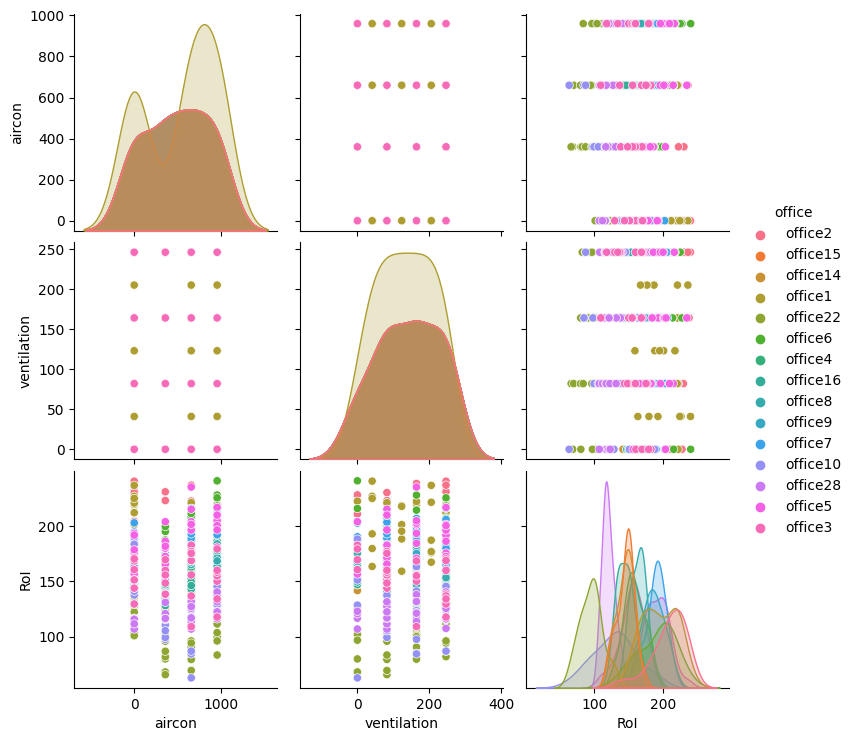

In [8]:
import seaborn as sns

# sns.pairplot(df_summary[["aircon", "ventilation", "RoI", "office"]], hue='office', diag_kind="hist")
sns.pairplot(df_summary[["aircon", "ventilation", "RoI", "office"]], hue='office')

In [3]:
df_floating = pd.read_csv("/mnt/MachineLearning/CountResults/floating_count_results/result_patientAverage.csv")

df_floating

,casename,num_floating,volume[ml]
0,office16_0_0,7466.2,0.000055
1,office16_0_164_aout,7488.2,0.000084
2,office16_0_164_bout,7567.0,0.000061
3,office16_0_246_aout,7554.8,0.000104
4,office16_0_246_bout,7347.6,0.000055
...,...,...,...
426,office22_960_164_bout,5152.6,0.000074
427,office22_960_246_aout,5205.0,0.000062
428,office22_960_246_bout,5495.0,0.000077
429,office22_960_82_aout,5298.8,0.000070


In [6]:
df_total = pd.merge(df_summary, df_floating, on="casename")
df_total

,casename,num_drop,volume[ml]_x,RoI,aircon,ventilation,exhaust,num_floating,volume[ml]_y
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,8110.8,0.000065
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,7951.8,0.000064
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,7729.6,0.000065
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,7844.8,0.000055
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,7264.4,0.000082
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,4807.2,0.000053
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,5593.6,0.000058
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,4586.8,0.000066
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,3453.2,0.000051


In [10]:
df_total["office"] = df_total["casename"].map(lambda casename: casename.split("_")[0])

In [11]:
df_total

,casename,num_drop,volume[ml]_x,RoI,aircon,ventilation,exhaust,num_floating,volume[ml]_y,office
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,8110.8,0.000065,office2
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,7951.8,0.000064,office2
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,7729.6,0.000065,office2
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,7844.8,0.000055,office2
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,7264.4,0.000082,office2
...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,4807.2,0.000053,office3
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,5593.6,0.000058,office3
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,4586.8,0.000066,office3
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,3453.2,0.000051,office3


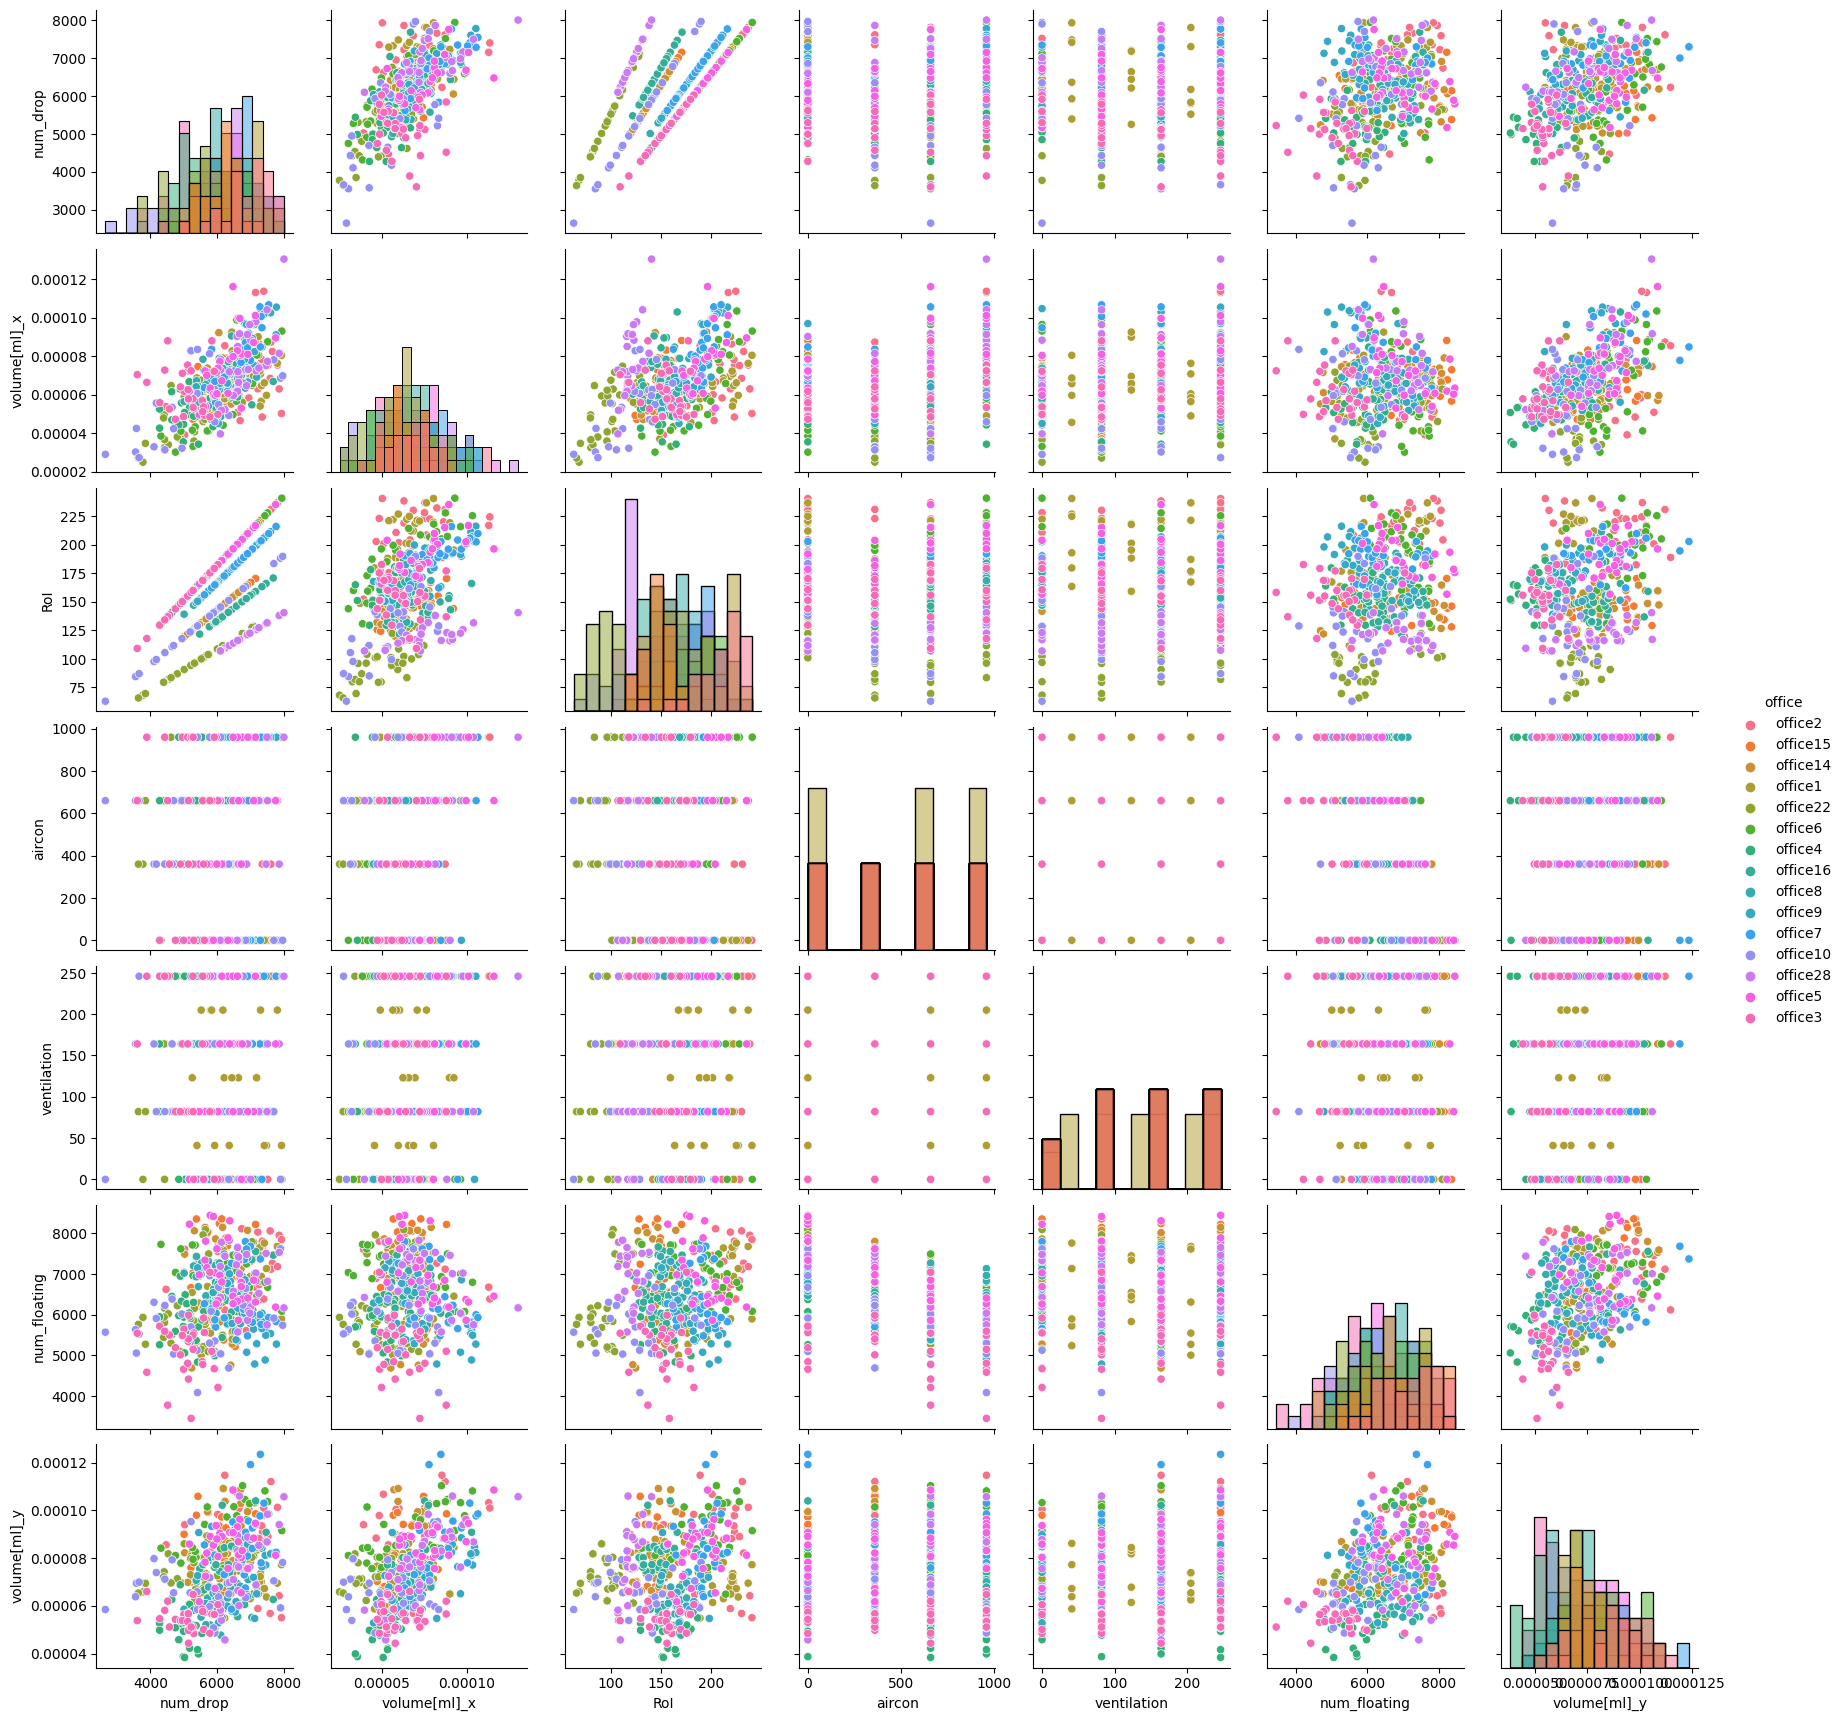

In [13]:
import seaborn as sns

sns.pairplot(df_total, hue='office', diag_kind="hist")

### 時間平均
観測ボックスカウントの時系列データの総和に対してデータ長さで割る（時間平均）

In [10]:
!pwd

/mnt/MachineLearning/NoteBook


In [36]:
import pandas as pd


df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/standing/count_sum.csv", header=None)
df

,0,1
0,office10_0_0,159847.6
1,office10_0_164_aout,364434.2
2,office10_0_164_bout,316048.0
3,office10_0_246_aout,265720.2
4,office10_0_246_bout,353631.2
...,...,...
426,office9_960_164_bout,251091.0
427,office9_960_246_aout,308771.8
428,office9_960_246_bout,285927.4
429,office9_960_82_aout,241167.6


In [37]:
df["timeMean"] = df[[1]] / 601.

In [38]:
df.set_axis(["case_name", "count_sum", "count_timeMean"], axis='columns', inplace=True)

In [39]:
df.to_csv("/mnt/MachineLearning/Count_timeSeries/standing/count_summary.csv", index=False)

In [45]:
df_summary = pd.read_csv("/mnt/MachineLearning/CountResults/summary_221015.csv")
df_summary

,casename,num_drop,volume[ml],RoI,aircon,ventilation,exhaust
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b
...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a


In [47]:
df_summary.rename(columns={"casename":"case_name"}, inplace=True)

In [50]:
df_total = pd.merge(df_summary, df, on="case_name")
df_total

,case_name,num_drop,volume[ml],RoI,aircon,ventilation,exhaust,count_sum,count_timeMean
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,542230.0,902.212978
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,357158.0,594.272879
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,260040.0,432.678869
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,196341.6,326.691514
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,338083.8,562.535441
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,468402.6,779.372047
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,999154.6,1662.486855
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,807346.4,1343.338436
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,679656.2,1130.875541


In [51]:
df_total["office"] = df_total["case_name"].map(lambda casename: casename.split("_")[0])
df_total

,case_name,num_drop,volume[ml],RoI,aircon,ventilation,exhaust,count_sum,count_timeMean,office
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,542230.0,902.212978,office2
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,357158.0,594.272879,office2
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,260040.0,432.678869,office2
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,196341.6,326.691514,office2
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,338083.8,562.535441,office2
...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,468402.6,779.372047,office3
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,999154.6,1662.486855,office3
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,807346.4,1343.338436,office3
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,679656.2,1130.875541,office3


In [62]:
df_total.rename(columns={"num_drop":"n_from2sec", "n_s_from2sec":"n_from2sec/S"}, inplace=True)
df_total

,case_name,n_from2sec,volume[ml],n_from2sec/S,aircon,ventilation,exhaust,count_sum,count_timeMean,office
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,542230.0,902.212978,office2
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,357158.0,594.272879,office2
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,260040.0,432.678869,office2
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,196341.6,326.691514,office2
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,338083.8,562.535441,office2
...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,468402.6,779.372047,office3
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,999154.6,1662.486855,office3
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,807346.4,1343.338436,office3
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,679656.2,1130.875541,office3


In [119]:
df_core = df_total.reindex(columns=['case_name', "office", 'aircon', 'ventilation', "exhaust", "n_from2sec", "n_from2sec/S", "count_timeMean", "fromSittingToStanding"])
df_core

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,count_timeMean,fromSittingToStanding
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [127]:
# Save

df_core.to_csv("/mnt/MachineLearning/data/summary_20221216.csv", index=False)

In [124]:
df_core = df_core.rename(columns={"count_timeMean":"countTimeMean_sit", "fromSittingToStanding":"countTimeMean_sit2stand"})
df_core

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


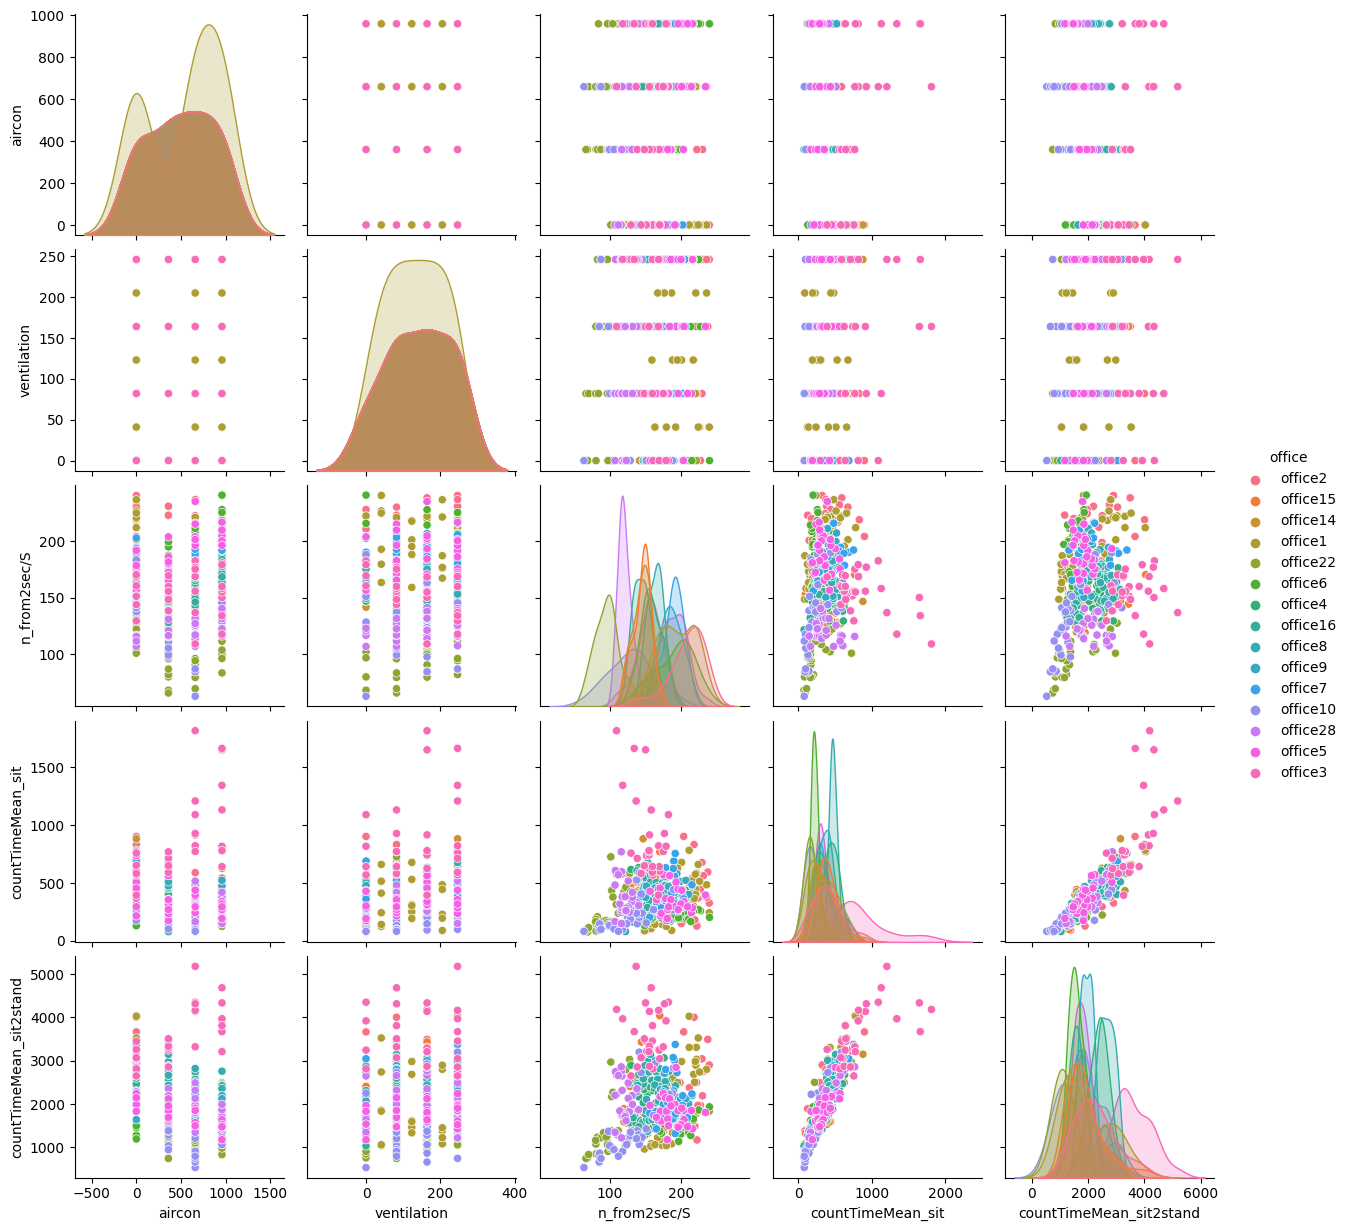

In [125]:
import seaborn as sns

sns.pairplot(df_core[["aircon", "ventilation", "exhaust", "n_from2sec/S", "countTimeMean_sit", "countTimeMean_sit2stand",  "office"]], hue='office')#, diag_kind="hist")

In [128]:
df_core.describe()

,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,499.071926,139.837587,6130.170302,161.902247,382.960333,2045.895491
std,360.876287,83.985694,921.844114,36.376848,219.342164,758.168789
min,0.000000,0.000000,2644.400000,62.961905,77.504160,536.517804
25%,0.000000,82.000000,5540.500000,138.530952,237.477704,1508.278536
50%,660.000000,164.000000,6169.400000,159.866667,344.316805,1858.661564
75%,960.000000,246.000000,6791.400000,188.787879,475.919135,2519.456240
max,960.000000,246.000000,8008.600000,240.763636,1814.896506,5176.822962


In [117]:
df_total

,case_name,n_from2sec,volume[ml],n_from2sec/S,aircon,ventilation,exhaust,count_sum,count_timeMean,office,level_0,fromSittingToStanding
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,542230.0,902.212978,office2,207,3665.252246
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,357158.0,594.272879,office2,208,3491.917804
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,260040.0,432.678869,office2,209,2354.737770
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,196341.6,326.691514,office2,210,2902.480532
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,338083.8,562.535441,office2,211,2757.177704
...,...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,468402.6,779.372047,office3,258,3209.723128
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,999154.6,1662.486855,office3,259,3671.024626
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,807346.4,1343.338436,office3,260,3968.834276
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,679656.2,1130.875541,office3,261,4683.139767


In [109]:
df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/fromSittingToStanding/patientMean/summary.csv")
df.mean()

office10_0_0            2252.703161
office10_0_164_aout     2926.278536
office10_0_164_bout     2282.463561
office10_0_246_aout     2833.539767
office10_0_246_bout     3197.744426
                           ...     
office9_960_164_bout    1781.674542
office9_960_246_aout    2118.157737
office9_960_246_bout    2195.030616
office9_960_82_aout     2004.255241
office9_960_82_bout     2123.449584
Length: 431, dtype: float64

In [110]:
s_mean = df.mean()
df_mean = pd.DataFrame({"fromSittingToStanding":s_mean})
df_mean

,fromSittingToStanding
office10_0_0,2252.703161
office10_0_164_aout,2926.278536
office10_0_164_bout,2282.463561
office10_0_246_aout,2833.539767
office10_0_246_bout,3197.744426
...,...
office9_960_164_bout,1781.674542
office9_960_246_aout,2118.157737
office9_960_246_bout,2195.030616
office9_960_82_aout,2004.255241


In [111]:
df = df_mean.reset_index()
df.rename(columns={'index': 'case_name'}, inplace=True)
df

,case_name,fromSittingToStanding
0,office10_0_0,2252.703161
1,office10_0_164_aout,2926.278536
2,office10_0_164_bout,2282.463561
3,office10_0_246_aout,2833.539767
4,office10_0_246_bout,3197.744426
...,...,...
426,office9_960_164_bout,1781.674542
427,office9_960_246_aout,2118.157737
428,office9_960_246_bout,2195.030616
429,office9_960_82_aout,2004.255241


In [106]:
df_total = pd.merge(df_total,df, on="case_name")
df_total

,case_name,n_from2sec,volume[ml],n_from2sec/S,aircon,ventilation,exhaust,count_sum,count_timeMean,office,level_0,fromSittingToStanding
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,542230.0,902.212978,office2,207,3665.252246
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,357158.0,594.272879,office2,208,3491.917804
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,260040.0,432.678869,office2,209,2354.737770
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,196341.6,326.691514,office2,210,2902.480532
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,338083.8,562.535441,office2,211,2757.177704
...,...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,468402.6,779.372047,office3,258,3209.723128
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,999154.6,1662.486855,office3,259,3671.024626
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,807346.4,1343.338436,office3,260,3968.834276
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,679656.2,1130.875541,office3,261,4683.139767


In [118]:
df_total = df_total.drop(columns="level_0")
df_total

,case_name,n_from2sec,volume[ml],n_from2sec/S,aircon,ventilation,exhaust,count_sum,count_timeMean,office,fromSittingToStanding
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off,542230.0,902.212978,office2,3665.252246
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a,357158.0,594.272879,office2,3491.917804
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b,260040.0,432.678869,office2,2354.737770
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a,196341.6,326.691514,office2,2902.480532
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b,338083.8,562.535441,office2,2757.177704
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b,468402.6,779.372047,office3,3209.723128
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a,999154.6,1662.486855,office3,3671.024626
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b,807346.4,1343.338436,office3,3968.834276
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a,679656.2,1130.875541,office3,4683.139767


0 28
28 56
56 84
84 123
123 151
151 179
179 207
207 235
235 263
263 291
291 319
319 347
347 375
375 403
403 431


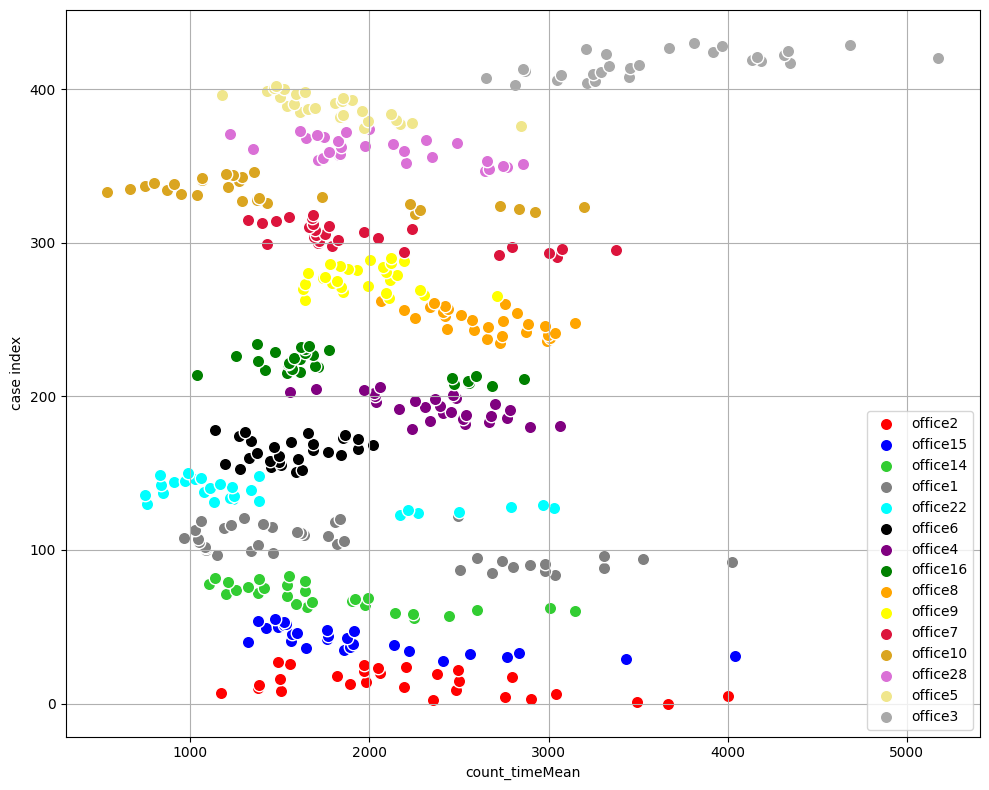

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 8])

#カラーマップ等の準備
markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
          "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")
start_index = 0

for idx, target_office_name in enumerate(df_total['office'].unique()):
    # datas = df_total[df_total['office'] == target_office_name]["count_timeMean"]
    datas = df_total[df_total['office'] == target_office_name]["fromSittingToStanding"]

    end_index = len(datas)+start_index
    print(start_index, end_index)
    plt.scatter(datas, range(start_index, end_index), 
                s=80, c=colors[idx], marker=markers[2], edgecolor="white", label=target_office_name)
    start_index = end_index

    

plt.ylabel("case index")
plt.xlabel("count_timeMean")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# 2022/12/19

In [145]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")
df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [146]:
df_eVar = pd.read_csv("/mnt/MachineLearning/data/ExplanatoryVariables.csv")
df_eVar

,case_name,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
0,office1_960_164_aout,960,164,a,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
1,office1_0_205_aout,0,205,a,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
2,office1_660_41_bout,660,41,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
3,office1_960_82_bout,960,82,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
4,office1_960_205_bout,960,205,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,office14_960_82_bout,960,82,b,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
427,office14_660_0,660,0,off,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
428,office14_360_246_aout,360,246,a,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
429,office14_960_0,960,0,off,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN


In [151]:
df_total = pd.merge(df_summary,df_eVar, on=["case_name", 'aircon', 'ventilation', 'exhaust'])

In [152]:
df_total.columns

Index(['case_name', 'office', 'aircon', 'ventilation', 'exhaust', 'n_from2sec',
       'n_from2sec/S', 'countTimeMean_sit', 'countTimeMean_sit2stand', '1_x',
       '1_y', '1_z', '1_angle', '2_x', '2_y', '2_z', '2_angle', '3_x', '3_y',
       '3_z', '3_angle', '4_x', '4_y', '4_z', '4_angle', '5_x', '5_y', '5_z',
       '5_angle', 'office_size_x', 'office_size_y', 'aircon_position_x',
       'aircon_position_y'],
      dtype='object')

In [159]:
df_core = df_total[[
        "aircon",
        "ventilation",
        "exhaust",
        "n_from2sec/S",
        "countTimeMean_sit",
        "countTimeMean_sit2stand",
        "office_size_x",
        "office_size_y",
        "office"
    ]]

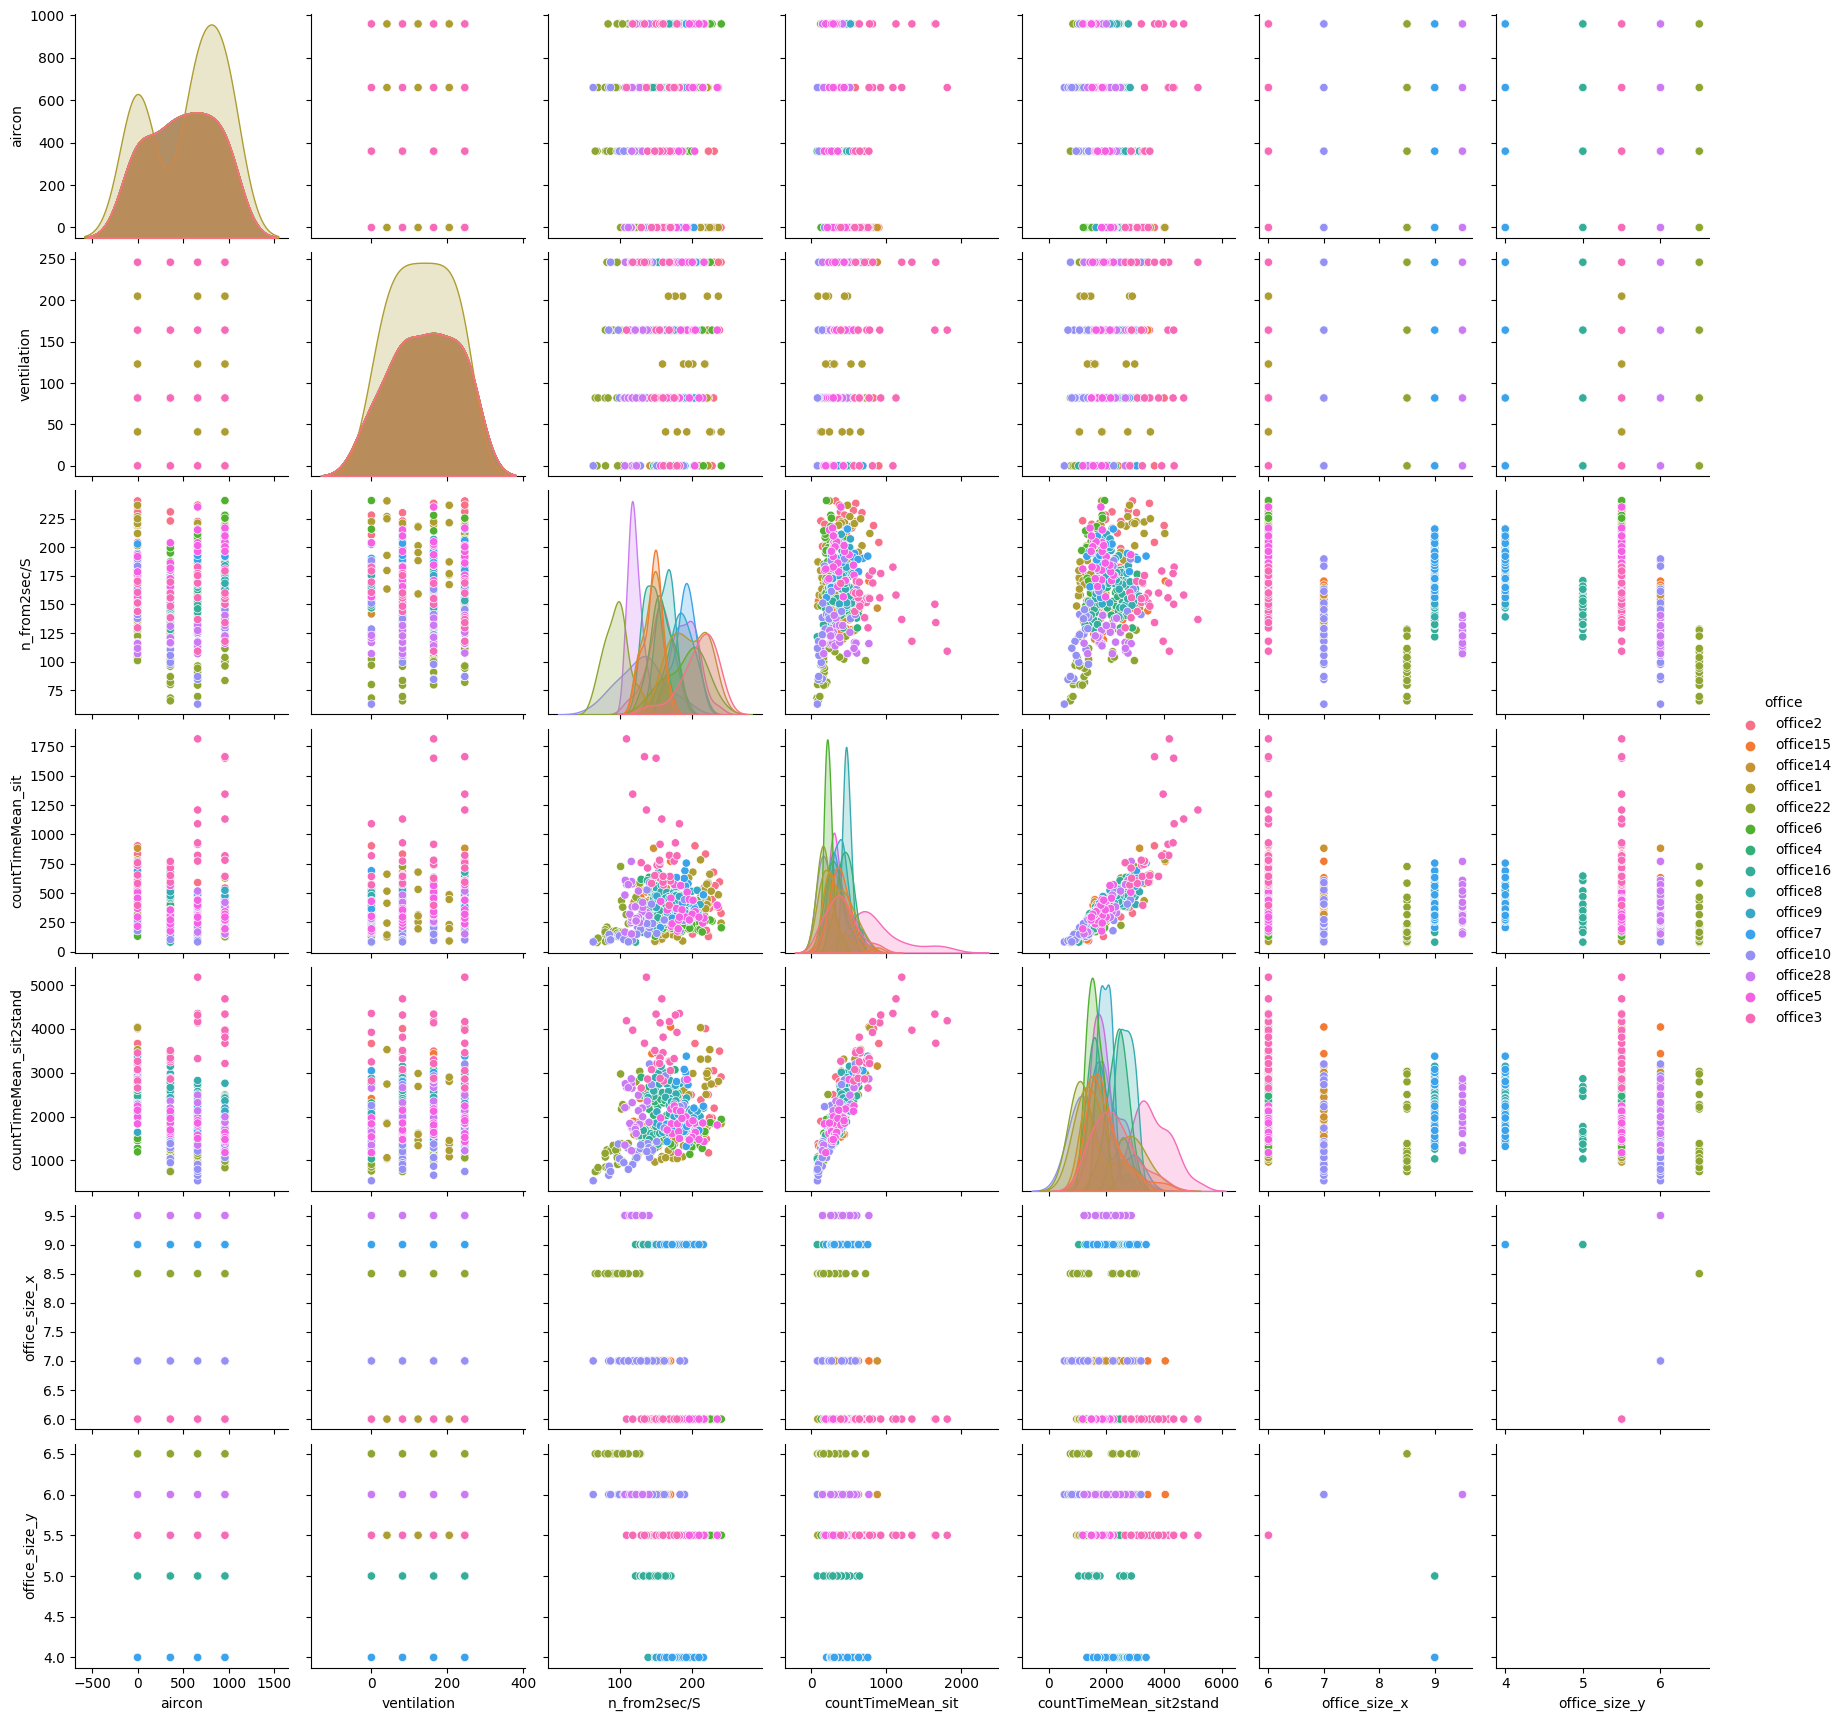

In [160]:
import seaborn as sns

sns.pairplot(df_core, hue='office')#, diag_kind="hist")

In [161]:
df_core_corr = df_core.corr()
df_core_corr

,aircon,ventilation,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,office_size_x,office_size_y
aircon,1.000000,-0.000993,0.067739,-0.235813,-0.414872,-0.011257,0.001948
ventilation,-0.000993,1.000000,0.026149,0.096199,0.053493,0.008717,-0.001508
n_from2sec/S,0.067739,0.026149,1.000000,0.112169,0.225968,-0.360334,-0.451068
countTimeMean_sit,-0.235813,0.096199,0.112169,1.000000,0.875188,-0.106501,-0.147555
countTimeMean_sit2stand,-0.414872,0.053493,0.225968,0.875188,1.000000,-0.101757,-0.186101
office_size_x,-0.011257,0.008717,-0.360334,-0.106501,-0.101757,1.000000,-0.410686
office_size_y,0.001948,-0.001508,-0.451068,-0.147555,-0.186101,-0.410686,1.000000


<AxesSubplot:>

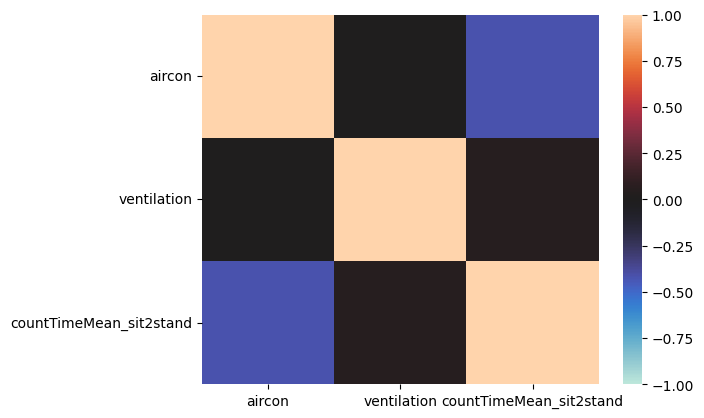

In [211]:
sns.heatmap(df_core_corr, vmax=1, vmin=-1, center=0)

# 22/12/20

In [163]:
df_eVar = pd.read_csv("/mnt/MachineLearning/data/ExplanatoryVariables.csv")
df_eVar

,case_name,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
0,office1_960_164_aout,960,164,a,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
1,office1_0_205_aout,0,205,a,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
2,office1_660_41_bout,660,41,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
3,office1_960_82_bout,960,82,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
4,office1_960_205_bout,960,205,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,office14_960_82_bout,960,82,b,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
427,office14_660_0,660,0,off,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
428,office14_360_246_aout,360,246,a,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
429,office14_960_0,960,0,off,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN


In [166]:
shape_dict = {
    "6, 5.5": ["office1", "office2", "office3", "office4", "office5", "office6", ],
    "9, 4": ["office7", "office8", "office9", ], 
    "7, 6": ["office10", "office11", "office12", "office13", "office14", "office15", ], 
    "9, 5": ["office16", "office17", "office18", "office19", "office20", "office21", ], 
    "8.5, 6.5": ["office22", "office23", "office24", "office25", "office26", "office27", ], 
    "9.5, 6": ["office28", "office29", "office30", "office31", "office32", "office33",], 
}

In [174]:
df_shape = df_eVar[["office_size_x", "office_size_y"]].drop_duplicates()
df_shape.

,office_size_x,office_size_y
0,6.0,5.5
39,7.0,6.0
95,9.0,5.0
151,8.5,6.5
179,9.5,6.0
235,9.0,4.0


In [177]:
df_shape.set_axis(['6, 5.5', '7, 6', '9, 5', '8.5, 6.5', '9.5, 6', '9, 4'], axis='index', inplace=True)

In [178]:
df_shape

,office_size_x,office_size_y
"6, 5.5",6.0,5.5
"7, 6",7.0,6.0
"9, 5",9.0,5.0
"8.5, 6.5",8.5,6.5
"9.5, 6",9.5,6.0
"9, 4",9.0,4.0


In [180]:
df_shape.reset_index(inplace=True)
df_shape

,index,office_size_x,office_size_y
0,"6, 5.5",6.0,5.5
1,"7, 6",7.0,6.0
2,"9, 5",9.0,5.0
3,"8.5, 6.5",8.5,6.5
4,"9.5, 6",9.5,6.0
5,"9, 4",9.0,4.0


In [185]:
df_shape.rename({'index':'office_type'}, axis='columns', inplace=True)
df_shape

,office_type,office_size_x,office_size_y
0,"6, 5.5",6.0,5.5
1,"7, 6",7.0,6.0
2,"9, 5",9.0,5.0
3,"8.5, 6.5",8.5,6.5
4,"9.5, 6",9.5,6.0
5,"9, 4",9.0,4.0


In [190]:
df_new = pd.merge(df_eVar, df_shape, on=["office_size_x", "office_size_y"])
df_new

,case_name,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,...,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y,office_type
0,office1_960_164_aout,960,164,a,4.760,2.18,1.255,180.0,3.285,3.16,...,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75,"6, 5.5"
1,office1_0_205_aout,0,205,a,4.760,2.18,1.255,180.0,3.285,3.16,...,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75,"6, 5.5"
2,office1_660_41_bout,660,41,b,4.760,2.18,1.255,180.0,3.285,3.16,...,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75,"6, 5.5"
3,office1_960_82_bout,960,82,b,4.760,2.18,1.255,180.0,3.285,3.16,...,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75,"6, 5.5"
4,office1_960_205_bout,960,205,b,4.760,2.18,1.255,180.0,3.285,3.16,...,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75,"6, 5.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,office9_960_82_bout,960,82,b,1.266,2.39,1.255,0.0,1.266,0.94,...,0.0,4.766,0.940,1.255,0.0,9.0,4.0,NaN,NaN,"9, 4"
427,office9_660_0,660,0,off,1.266,2.39,1.255,0.0,1.266,0.94,...,0.0,4.766,0.940,1.255,0.0,9.0,4.0,NaN,NaN,"9, 4"
428,office9_360_246_aout,360,246,a,1.266,2.39,1.255,0.0,1.266,0.94,...,0.0,4.766,0.940,1.255,0.0,9.0,4.0,NaN,NaN,"9, 4"
429,office9_960_0,960,0,off,1.266,2.39,1.255,0.0,1.266,0.94,...,0.0,4.766,0.940,1.255,0.0,9.0,4.0,NaN,NaN,"9, 4"


In [192]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 430
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_name          431 non-null    object 
 1   aircon             431 non-null    int64  
 2   ventilation        431 non-null    int64  
 3   exhaust            431 non-null    object 
 4   1_x                431 non-null    float64
 5   1_y                431 non-null    float64
 6   1_z                431 non-null    float64
 7   1_angle            431 non-null    float64
 8   2_x                431 non-null    float64
 9   2_y                431 non-null    float64
 10  2_z                431 non-null    float64
 11  2_angle            431 non-null    float64
 12  3_x                431 non-null    float64
 13  3_y                431 non-null    float64
 14  3_z                431 non-null    float64
 15  3_angle            431 non-null    float64
 16  4_x                431 non

In [194]:
df_new.to_csv("/mnt/MachineLearning/data/ExplanatoryVariables_20221220.csv", index=False)

In [197]:
df_read = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")
df_read

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [201]:
df_total = pd.merge(df_new, df_read, on=["case_name", "aircon", "ventilation", "exhaust"])
df_total

,case_name,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,...,office_size_x,office_size_y,aircon_position_x,aircon_position_y,office_type,office,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office1_960_164_aout,960,164,a,4.760,2.18,1.255,180.0,3.285,3.16,...,6.0,5.5,3.0,2.75,"6, 5.5",office1,5203.0,157.666667,147.238935,1028.000000
1,office1_0_205_aout,0,205,a,4.760,2.18,1.255,180.0,3.285,3.16,...,6.0,5.5,3.0,2.75,"6, 5.5",office1,7809.8,236.660606,484.694176,2802.586356
2,office1_660_41_bout,660,41,b,4.760,2.18,1.255,180.0,3.285,3.16,...,6.0,5.5,3.0,2.75,"6, 5.5",office1,5928.6,179.654545,124.602662,1041.177038
3,office1_960_82_bout,960,82,b,4.760,2.18,1.255,180.0,3.285,3.16,...,6.0,5.5,3.0,2.75,"6, 5.5",office1,6454.6,195.593939,627.418303,2495.318802
4,office1_960_205_bout,960,205,b,4.760,2.18,1.255,180.0,3.285,3.16,...,6.0,5.5,3.0,2.75,"6, 5.5",office1,5522.4,167.345455,196.204992,1227.158070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,office9_960_82_bout,960,82,b,1.266,2.39,1.255,0.0,1.266,0.94,...,9.0,4.0,NaN,NaN,"9, 4",office9,7461.4,207.261111,522.800998,2123.449584
427,office9_660_0,660,0,off,1.266,2.39,1.255,0.0,1.266,0.94,...,9.0,4.0,NaN,NaN,"9, 4",office9,6702.6,186.183333,305.612978,1739.122463
428,office9_360_246_aout,360,246,a,1.266,2.39,1.255,0.0,1.266,0.94,...,9.0,4.0,NaN,NaN,"9, 4",office9,6642.4,184.511111,289.551747,1638.698835
429,office9_960_0,960,0,off,1.266,2.39,1.255,0.0,1.266,0.94,...,9.0,4.0,NaN,NaN,"9, 4",office9,7293.2,202.588889,435.075874,2075.274542


In [237]:
df_core = df_total[["aircon", "ventilation", "exhaust", "office", "office_type", "countTimeMean_sit2stand"]]
df_core

,aircon,ventilation,exhaust,office,office_type,countTimeMean_sit2stand
0,960,164,a,office1,"6, 5.5",1028.000000
1,0,205,a,office1,"6, 5.5",2802.586356
2,660,41,b,office1,"6, 5.5",1041.177038
3,960,82,b,office1,"6, 5.5",2495.318802
4,960,205,b,office1,"6, 5.5",1227.158070
...,...,...,...,...,...,...
426,960,82,b,office9,"9, 4",2123.449584
427,660,0,off,office9,"9, 4",1739.122463
428,360,246,a,office9,"9, 4",1638.698835
429,960,0,off,office9,"9, 4",2075.274542


In [238]:
df_onehot = pd.get_dummies(df_core, columns=['office'])
df_onehot

,aircon,ventilation,exhaust,office_type,countTimeMean_sit2stand,office_office1,office_office10,office_office14,office_office15,office_office16,office_office2,office_office22,office_office28,office_office3,office_office4,office_office5,office_office6,office_office7,office_office8,office_office9
0,960,164,a,"6, 5.5",1028.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,205,a,"6, 5.5",2802.586356,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660,41,b,"6, 5.5",1041.177038,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,960,82,b,"6, 5.5",2495.318802,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,960,205,b,"6, 5.5",1227.158070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,960,82,b,"9, 4",2123.449584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
427,660,0,off,"9, 4",1739.122463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
428,360,246,a,"9, 4",1638.698835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
429,960,0,off,"9, 4",2075.274542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [243]:
df_corr = df_onehot.drop(columns=["aircon", "ventilation"]).corr()
df_corr["countTimeMean_sit2stand"]

countTimeMean_sit2stand    1.000000
office_office1            -0.039058
office_office10           -0.191641
office_office14           -0.092226
office_office15           -0.025962
office_office16           -0.083639
office_office2             0.071095
office_office22           -0.209035
office_office28            0.005425
office_office3             0.547313
office_office4             0.113681
office_office5            -0.087331
office_office6            -0.168589
office_office7            -0.015675
office_office8             0.208281
office_office9            -0.026234
Name: countTimeMean_sit2stand, dtype: float64

<AxesSubplot:>

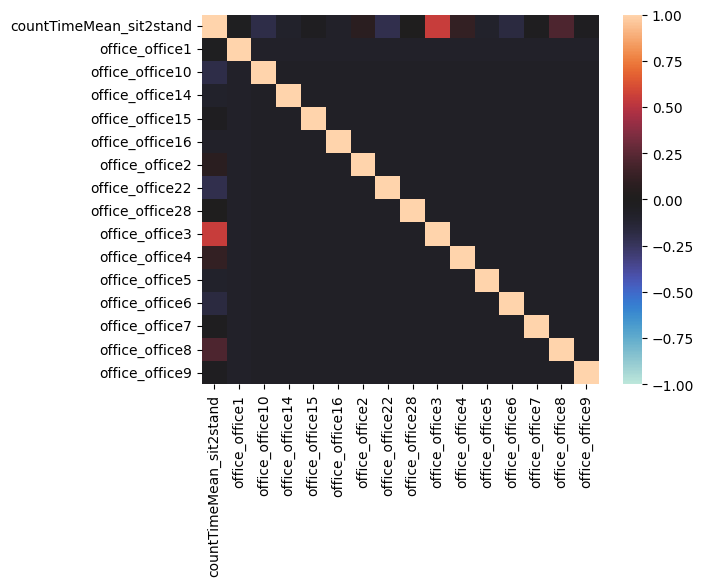

In [244]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [245]:
df_onehot = pd.get_dummies(df_core, columns=['office_type'])
df_onehot

,aircon,ventilation,exhaust,office,countTimeMean_sit2stand,"office_type_6, 5.5","office_type_7, 6","office_type_8.5, 6.5","office_type_9, 4","office_type_9, 5","office_type_9.5, 6"
0,960,164,a,office1,1028.000000,1,0,0,0,0,0
1,0,205,a,office1,2802.586356,1,0,0,0,0,0
2,660,41,b,office1,1041.177038,1,0,0,0,0,0
3,960,82,b,office1,2495.318802,1,0,0,0,0,0
4,960,205,b,office1,1227.158070,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
426,960,82,b,office9,2123.449584,0,0,0,1,0,0
427,660,0,off,office9,1739.122463,0,0,0,1,0,0
428,360,246,a,office9,1638.698835,0,0,0,1,0,0
429,960,0,off,office9,2075.274542,0,0,0,1,0,0


In [246]:
df_corr = df_onehot.drop(columns=["aircon", "ventilation"]).corr()
df_corr["countTimeMean_sit2stand"]

countTimeMean_sit2stand    1.000000
office_type_6, 5.5         0.215420
office_type_7, 6          -0.192775
office_type_8.5, 6.5      -0.209035
office_type_9, 4           0.103516
office_type_9, 5          -0.083639
office_type_9.5, 6         0.005425
Name: countTimeMean_sit2stand, dtype: float64

<AxesSubplot:>

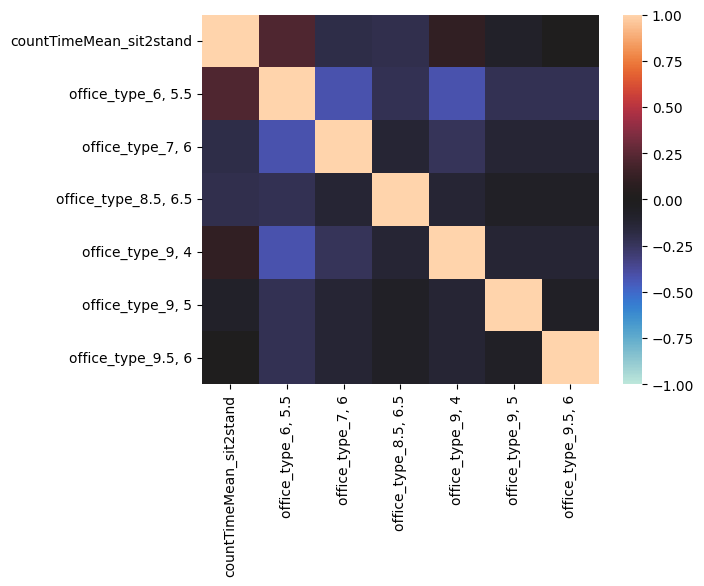

In [230]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [251]:
df_onehot = pd.get_dummies(df_core, columns=['exhaust'])
df_onehot

,aircon,ventilation,office,office_type,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,960,164,office1,"6, 5.5",1028.000000,1,0,0
1,0,205,office1,"6, 5.5",2802.586356,1,0,0
2,660,41,office1,"6, 5.5",1041.177038,0,1,0
3,960,82,office1,"6, 5.5",2495.318802,0,1,0
4,960,205,office1,"6, 5.5",1227.158070,0,1,0
...,...,...,...,...,...,...,...,...
426,960,82,office9,"9, 4",2123.449584,0,1,0
427,660,0,office9,"9, 4",1739.122463,0,0,1
428,360,246,office9,"9, 4",1638.698835,1,0,0
429,960,0,office9,"9, 4",2075.274542,0,0,1


In [252]:
df_corr = df_onehot[["countTimeMean_sit2stand", "aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]].corr()
df_corr["countTimeMean_sit2stand"]

countTimeMean_sit2stand    1.000000
aircon                    -0.414872
ventilation                0.053493
exhaust_a                 -0.002730
exhaust_b                  0.030704
exhaust_off               -0.040308
Name: countTimeMean_sit2stand, dtype: float64

<AxesSubplot:>

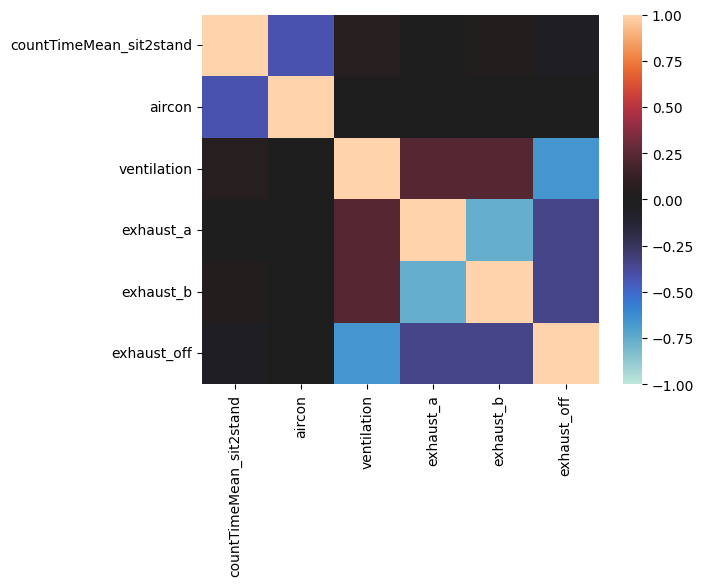

In [236]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)